<a href="https://colab.research.google.com/github/DANU011/practice-analysis/blob/main/bigdata/bigdata_chap5_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Regression Analysis
#### 캘리포니아 주택가격 데이터

In [ ]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

california = fetch_california_housing()
california_dt = california.data # 독립변수 만으로 된 numpy 형태
price = california.target # 종속변수 값을 numpy 형태

df = pd.DataFrame(california_dt, columns = california.feature_names)
df['PRICE'] = price

In [ ]:
# head 확인
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


변수 구분과 내용
  - MedInc (중간 소득) : 중간 소득.  
  - HouseAge (주택 연식) : 주택의 중간 연식.  
  - AveRooms (평균 방 개수) : 주택 내의 평균 방 개수.  
  - AveBedrms (평균 침실 개수) : 주택 내의 평균 침실 개수.  
  - Population (인구) : 해당 지역의 인구 수.  
  - AveOccup (평균 자가 비율) : 주택의 평균 자가 비율.  
  - Latitude (위도) : 주택의 위도.  
  - Longitude (경도) : 주택의 경도.  
  - MedHouseVal (중간 주택 가격) : 중간 주택 가격(타겟 변수).  

In [ ]:
# 데이터 형태 확인
df.shape

(20640, 9)

In [ ]:
# 데이터 타입과 null값 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   PRICE       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [ ]:
# 결측치 확인
df.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
PRICE         0
dtype: int64

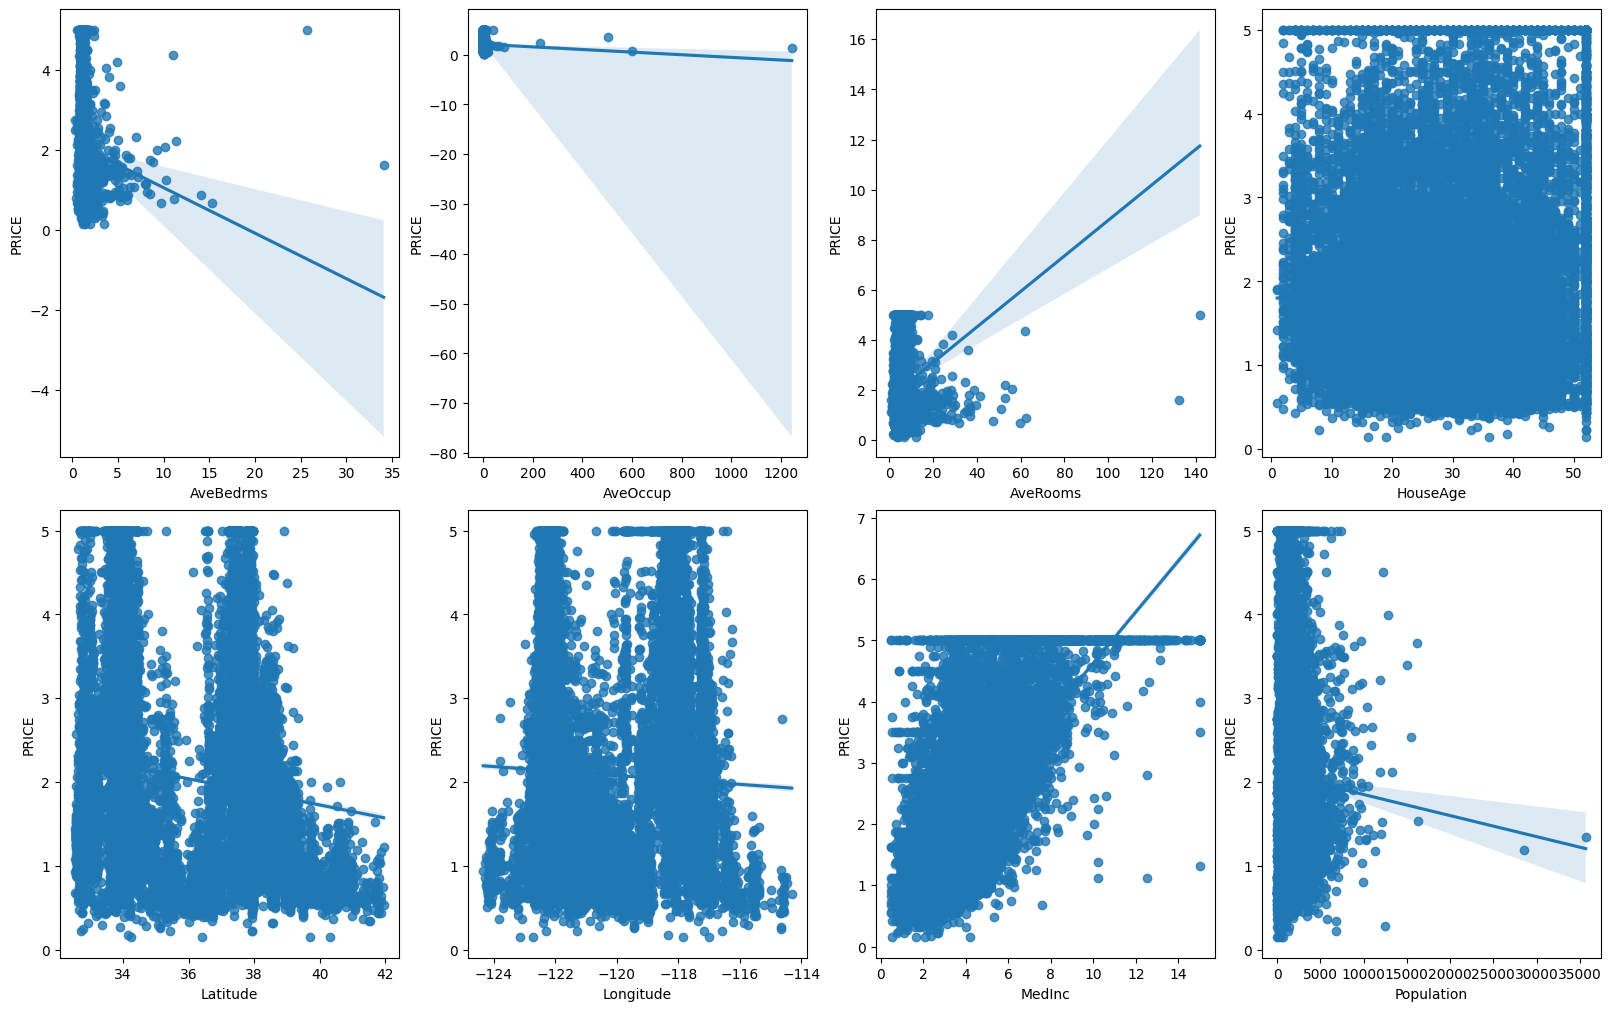

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(figsize = (16, 10), ncols = 4, nrows = 2,
                        constrained_layout = True)
features = df.columns.difference(['PRICE'])

for i, feature in enumerate(features) :
  row = int(i / 4)
  col = i % 4

  # seaborn의 regplot을 이용해 산점도와 선형 회귀직선을 함께 시각화
  sns.regplot(x = feature, y = 'PRICE', data = df, ax = axs[row][col])